In [281]:
###############################################     Libraries      ##############################

In [85]:
import math
import matplotlib as pp
import numpy as np
import seaborn
from matplotlib import pyplot as plt
import plotly as py
import plotly.graph_objects as go
import plotly.express as px
import datetime as dt
from plotly.subplots import make_subplots
import os
import pandas as pd

import sklearn.datasets as datasets
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
from mpl_toolkits.mplot3d import Axes3D


from numpy import where
from numpy import unique

from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA


In [86]:
######################################            Importing and Cleaning              ############################# 

In [87]:
user_input = [[75,4,5,8,77,88,99,-9999,-9999]]

In [88]:
df = pd.read_csv("https://raw.githubusercontent.com/RCyn/DreamCity/main/FinalData.csv")

In [89]:
df

,City,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,Congestion Level,Education,Annual Temperature,lat,lng
0,Caracas,65.18,11.25,44.44,83.45,8.61,85.70,9,10.00,71.60,10.480594,-66.903606
1,Johannesburg,84.08,53.99,59.98,47.39,51.26,83.93,30,41.50,59.90,-26.204103,28.047305
2,Fortaleza,80.17,52.28,45.46,66.32,36.68,78.65,37,10.00,79.90,-3.732714,-38.526998
3,Mexico City,75.07,24.28,61.76,18.95,27.91,77.86,52,60.25,63.50,19.432608,-99.133208
4,Detroit,70.63,73.81,63.05,83.45,50.99,76.69,16,26.00,50.00,42.331427,-83.045754
...,...,...,...,...,...,...,...,...,...,...,...,...
199,Munich,86.00,63.28,88.43,43.08,90.08,15.34,30,97.00,46.40,48.135125,11.581980
200,Dusseldorf,83.45,72.52,75.98,8.61,88.02,15.34,24,48.75,50.40,51.227741,6.773456
201,Tokyo,80.00,47.57,71.53,30.54,69.29,13.91,42,98.50,59.70,35.676192,139.650311
202,Abu Dhabi,86.40,68.03,48.02,53.42,80.80,10.86,10,34.75,80.24,24.453884,54.377344


In [90]:
col_1='Movehub Rating'
col_2='Purchase Power'
col_3='Health Care'
col_4='Pollution'
col_5='Quality of Life'
col_6='Crime Rating'
col_7='Congestion Level'
col_8='Education'
col_9='Annual Temperature'

In [91]:
val_df=df.loc[:, col_1:col_9]
val_df

,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,Congestion Level,Education,Annual Temperature
0,65.18,11.25,44.44,83.45,8.61,85.70,9,10.00,71.60
1,84.08,53.99,59.98,47.39,51.26,83.93,30,41.50,59.90
2,80.17,52.28,45.46,66.32,36.68,78.65,37,10.00,79.90
3,75.07,24.28,61.76,18.95,27.91,77.86,52,60.25,63.50
4,70.63,73.81,63.05,83.45,50.99,76.69,16,26.00,50.00
...,...,...,...,...,...,...,...,...,...
199,86.00,63.28,88.43,43.08,90.08,15.34,30,97.00,46.40
200,83.45,72.52,75.98,8.61,88.02,15.34,24,48.75,50.40
201,80.00,47.57,71.53,30.54,69.29,13.91,42,98.50,59.70
202,86.40,68.03,48.02,53.42,80.80,10.86,10,34.75,80.24


In [92]:
######################################             End of Importing and Cleaning            ############################# 

In [93]:
#############################                         Clustering       ###################################################

In [94]:
X_reduced = PCA(n_components=9).fit_transform(val_df)

In [95]:
from sklearn.cluster import KMeans
#startup = np.array([[60,30,50,30,50,33,22,40,47],[60,60,55,30,80,55,13,35,47],[90,60,55,60,80,33,44,60,70],
 #          [79,46,66,44,60,41,27,47,29],[90,56,70,56,34,55,33,34,50],[79,56,77,33,55,50,33,55,70],
 #         [60,46,66,33,52,30,44,55,59],[90,50,45,33,60,41,15,47,70]])
model = KMeans(n_clusters=8, n_init=100)
model.fit(X_reduced)
clusters = unique(model.labels_)
df["Cluster"] = model.labels_
print(df.mean(axis = 0))
for i in range(len(user_input[0])):
    if user_input[0][i] == -9999:
        user_input[0][i] = df.mean(axis = 0)[i]
prediction = model.predict(user_input)[0]

Movehub Rating        79.772696
Purchase Power        46.510980
Health Care           66.321275
Pollution             44.884020
Quality of Life       60.021324
Crime Rating          41.607892
Congestion Level      27.357843
Education             47.432598
Annual Temperature    59.777549
lat                   29.753758
lng                    2.053508
Cluster                3.392157
dtype: float64


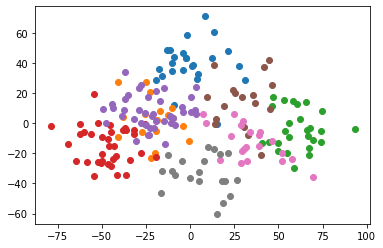

In [96]:
for cluster in clusters:
    row_ix = where(model.labels_ == cluster)
    plt.scatter(X_reduced[row_ix, 0], X_reduced[row_ix, 1])
    if cluster == prediction:
        targetCluster = row_ix
plt.show()

In [97]:
print(targetCluster)

(array([  0,   2,   5,   6,  14,  15,  16,  19,  30,  33,  40,  41,  44,
        46,  54,  62,  66,  68,  77,  88, 100, 114, 118, 119, 125, 131],
      dtype=int64),)


In [98]:
######################################             End of Clustering            ############################# 

In [99]:
######################################             Plot Making            ############################# 

In [100]:
def generate_score(val_df,importance,ideal_temp):
    score=[]
    for i in range(val_df.shape[0]):
        score_num=0
        score_num=score_num+sum([x*y for x,y in zip(val_df.loc[:,col_1:col_8].values.tolist()[i],importance)])
        score_num=score_num+math.fabs(val_df.loc[:,col_9].values.tolist()[i]-ideal_temp)
        score.append(score_num)
    max_value=max(score)
    for i in range(len(score)):
        score[i]=score[i]/max_value*100
    return score


In [101]:
importance=user_input[0]
for i in range(len(importance)):
    if importance[i]==-9999:
        importance[i]=0
ideal_temp=68
generate_score(val_df,importance,ideal_temp)
df['Score']=generate_score(val_df,importance,ideal_temp)

In [102]:
#Parse df for ploting
df_to_plot=df.iloc[[targetCluster[0][0]]]

for i in range(1,len(targetCluster[0])):
    df_to_plot=df_to_plot.append(df.iloc[[targetCluster[0][i]]])


In [103]:
df_to_plot['Score']=generate_score(df_to_plot,importance,ideal_temp)

In [104]:
df_to_plot

,City,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,Congestion Level,Education,Annual Temperature,lat,lng,Cluster,Score
0,Caracas,65.18,11.25,44.44,83.45,8.61,85.70,9,10.00,71.6,10.480594,-66.903606,2,70.881110
2,Fortaleza,80.17,52.28,45.46,66.32,36.68,78.65,37,10.00,79.9,-3.732714,-38.526998,2,96.098492
5,Porto Alegre,70.46,19.07,51.01,86.16,31.87,76.46,35,10.00,67.1,-30.034647,-51.217658,2,89.438378
6,Karachi,67.81,14.63,51.57,69.63,18.50,74.36,9,26.00,78.8,24.860734,67.001136,2,73.945246
14,Rio De Janeiro,73.44,22.13,61.67,84.51,21.32,67.93,46,23.50,74.8,-22.906847,-43.172897,2,91.501218
15,Manila,68.31,14.80,80.56,65.22,13.14,66.36,71,36.25,83.1,14.599512,120.984220,2,100.000000
16,Sao Paulo,75.40,24.24,63.79,72.04,30.57,66.31,45,26.00,66.6,-23.550520,-46.633309,2,94.494273
19,Lima,73.19,23.22,53.70,58.49,22.67,65.31,57,26.50,66.6,-12.046373,-77.042754,2,95.353937
30,Dhaka,71.58,21.32,20.83,62.14,13.48,59.06,16,16.25,78.6,23.810332,90.412518,2,67.469241
33,Saint Petersburg,73.10,24.82,46.34,77.98,25.97,56.96,49,39.25,42.4,59.931058,30.360910,2,92.937197


In [105]:
features = ['Movehub Rating', 'Purchase Power', 'Health Care', 'Quality of Life', 'Pollution', 'Crime Rating','Congestion Level','Education','Annual Temperature']

In [106]:
def create_graph(df):
    fig = px.scatter_mapbox(df.sort_values('Score', ascending=False).round(),
                        lat="lat", lon="lng", color="Score", hover_name="City",
                        hover_data=features,
                        color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=1,
                        mapbox_style="carto-positron")
    fig.show()

In [107]:
create_graph(df_to_plot)

In [108]:
df.sort_values('Score', ascending=False)[['City', 'Score'] + features].round()

,City,Score,Movehub Rating,Purchase Power,Health Care,Quality of Life,Pollution,Crime Rating,Congestion Level,Education,Annual Temperature
17,Los Angeles,100.0,87.0,63.0,69.0,63.0,75.0,66.0,42,81.0,65.0
43,Paris,96.0,96.0,47.0,83.0,53.0,59.0,54.0,39,94.0,54.0
57,London,95.0,100.0,53.0,70.0,48.0,58.0,50.0,38,99.0,50.0
63,Melbourne,95.0,93.0,55.0,77.0,69.0,30.0,49.0,30,98.0,59.0
12,Cape Town,95.0,88.0,60.0,72.0,79.0,76.0,68.0,32,40.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...
47,Lahore,53.0,67.0,12.0,49.0,29.0,31.0,52.0,9,14.0,76.0
114,Belgrade,52.0,72.0,21.0,53.0,36.0,77.0,38.0,9,9.0,54.0
77,Ulaanbaatar,52.0,68.0,15.0,43.0,24.0,56.0,47.0,10,15.0,31.0
118,Baku,46.0,66.0,11.0,29.0,17.0,49.0,37.0,16,9.0,59.0


In [109]:
######################################             End of Plot Making            ############################# 

In [110]:
######################################             Start of Feeling Lucky Plot          ###################

In [111]:
user_input_city="Paris"

In [112]:
df

,City,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,Congestion Level,Education,Annual Temperature,lat,lng,Cluster,Score
0,Caracas,65.18,11.25,44.44,83.45,8.61,85.70,9,10.00,71.60,10.480594,-66.903606,2,58.438719
1,Johannesburg,84.08,53.99,59.98,47.39,51.26,83.93,30,41.50,59.90,-26.204103,28.047305,0,89.120106
2,Fortaleza,80.17,52.28,45.46,66.32,36.68,78.65,37,10.00,79.90,-3.732714,-38.526998,2,79.229470
3,Mexico City,75.07,24.28,61.76,18.95,27.91,77.86,52,60.25,63.50,19.432608,-99.133208,7,88.051446
4,Detroit,70.63,73.81,63.05,83.45,50.99,76.69,16,26.00,50.00,42.331427,-83.045754,0,76.234893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,Munich,86.00,63.28,88.43,43.08,90.08,15.34,30,97.00,46.40,48.135125,11.581980,3,88.695613
200,Dusseldorf,83.45,72.52,75.98,8.61,88.02,15.34,24,48.75,50.40,51.227741,6.773456,4,75.268827
201,Tokyo,80.00,47.57,71.53,30.54,69.29,13.91,42,98.50,59.70,35.676192,139.650311,3,84.222674
202,Abu Dhabi,86.40,68.03,48.02,53.42,80.80,10.86,10,34.75,80.24,24.453884,54.377344,0,65.462643


In [113]:
df.index[df['City']=="Paris"][0]

43

In [114]:
df.loc[43,"Cluster"]

1

In [115]:
def find_df(user_input_city):
    index_num=df.index[df['City']==user_input_city][0]
    cluster_num=df.loc[index_num,"Cluster"]
    df_temp=df
    rows_to_drop=[]
    for i in range(len(df_temp)):
        if df_temp.loc[i,"Cluster"] !=cluster_num:
            rows_to_drop.append(i)
    return df_temp.drop(rows_to_drop)


In [116]:
find_df(user_input_city)

,City,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,Congestion Level,Education,Annual Temperature,lat,lng,Cluster,Score
17,Los Angeles,86.86,62.75,68.61,75.20,62.82,65.74,42,81.25,65.4,34.052234,-118.243685,1,100.000000
43,Paris,95.92,47.08,83.33,59.18,52.62,53.75,39,94.25,54.1,48.856614,2.352222,1,96.404374
57,London,100.00,53.17,69.53,57.95,47.89,50.14,38,99.25,50.5,51.507351,-0.127758,1,95.308963
70,Birmingham,80.85,46.41,75.23,66.53,75.40,47.51,28,63.25,48.6,33.518589,-86.810357,1,87.053750
73,Nice,82.55,49.52,87.95,59.19,68.34,47.27,31,64.50,58.6,43.710173,7.261953,1,86.774289
98,Barcelona,83.37,45.68,58.47,71.75,47.18,41.47,29,84.25,64.8,36.088106,-95.924131,1,81.430564
103,Galway,83.19,58.59,52.97,52.47,77.85,40.78,9,75.00,49.6,53.270668,-9.056790,1,80.495800
104,Boston,82.20,59.28,78.04,61.77,82.81,40.69,26,91.00,51.7,42.360083,-71.058880,1,91.662505
110,Madrid,85.37,54.07,73.51,55.77,59.87,39.34,23,79.75,59.0,40.416775,-3.703790,1,81.882091
130,Malmo,81.37,52.56,87.96,83.45,60.32,33.97,15,87.00,46.6,55.604981,13.003822,1,78.519368


In [117]:
def create_lucky_graph(df):
    fig = px.scatter_mapbox(df.sort_values('Cluster', ascending=False).round(),
                        lat="lat", lon="lng", color="Cluster", hover_name="City",
                        hover_data=features,
                        size_max=15, zoom=1,
                        mapbox_style="carto-positron")
    fig.update_layout(coloraxis_showscale=False)
    fig.show()

In [118]:
create_lucky_graph(find_df(user_input_city))